______
# Employee Attrition Analysis: Uncovering the Secrets Behind Employee Turnover
by: Fadhiil Dzaki Mulyana
_____
This notebook contains exploratory data analysis of employee turnover to identify the underlying issues causing turnover.


# A. Identifikasi Masalah

**Dashboard:**<br>
[Employee Attrition Dashboard](https://public.tableau.com/views/EmployeeAttritionAnalysis_17363214134160/Dashboard1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)

**Data Description:**<br>
[Employee Attrition and Factors](https://www.kaggle.com/datasets/thedevastator/employee-attrition-and-factors/data)

This dataset offers a comprehensive and varied analysis of an organization's employees, focusing on areas such as employee attrition, personal and job-related factors, and financials. It includes numerous parameters such as Age, Gender, Marital Status, Business Travel Frequency, Daily Rate of Pay, and Departmental Information, such as Distance From Home Office or Education Level Obtained by the employee. Additionally, it encompasses various job-related parameters, such as Job Involvement (level), Job Level (relative to similar roles within the same organization), Job Role (specific function/task), total working hours in a week/month/year (including overtime or standard hours for a given role). Furthermore, it details aspects like Percent Salary Hike during tenure with the company (from promotions or otherwise), Performance Rating based on specific criteria established by leadership, Relationship Satisfaction among peers at the workplace (including influences from family members that affect stress levels in varying capacities), and Monthly Income (starting point upon hiring, compared against current monthly pay rate, including overtime if applicable). Lastly, the Retirement Status, commonly known as Attrition, is highlighted; covering whether there was an intent to stay with one employer through retirement age or if attrition occurred for reasons beyond one's control earlier than expected.

| Column Name                 | Description                                                            |
|-----------------------------|------------------------------------------------------------------------|
| Age                         | Employee's age. (Numeric)                                              |
| Attrition                   | Whether the employee has left the organization. (Categorical)          |
| BusinessTravel              | Frequency of employee's business travel. (Categorical)                 |
| DailyRate                   | Employee's daily rate of pay. (Numeric)                                |
| Department                  | Department where the employee works. (Categorical)                     |
| DistanceFromHome            | Distance of employee's home in miles. (Numeric)                        |
| Education                   | Education level attained by the employee. (Categorical)                |
| EducationField              | Field of study of the employee's education. (Categorical)              |
| EmployeeCount               | Total number of employees in the organization. (Numeric)               |
| EmployeeNumber              | Unique identification number for each employee profile. (Numeric)      |
| EnvironmentSatisfaction     | Employee's satisfaction with the work environment (1-4). (Categorical) |
| Gender                      | Employee's gender. (Categorical)                                       |
| HourlyRate                  | Employee's hourly rate of pay. (Numeric)                               |
| JobInvolvement              | Level of involvement in the job (1-4). (Categorical)                   |
| JobLevel                    | Job level of the employee. (Categorical)                               |
| JobRole                     | Employee's role within the organization. (Categorical)                 |
| JobSatisfaction             | Employee's satisfaction with their job (1-4). (Categorical)            |
| MaritalStatus               | Employee's marital status. (Categorical)                               |
| MonthlyIncome               | Employee's monthly income. (Numeric)                                   |
| MonthlyRate                 | Employee's monthly rate of pay. (Numeric)                              |
| NumCompaniesWorked          | Number of companies the employee has worked for. (Numeric)             |
| Over18                      | Whether the employee is over 18 years old. (Categorical)               |
| OverTime                    | Whether the employee works overtime. (Categorical)                     |
| PercentSalaryHike           | Percentage increase in employee's salary. (Numeric)                    |
| PerformanceRating           | Employee's performance rating. (Categorical)                           |
| RelationshipSatisfaction    | Employee's satisfaction with relationships at work (1-4). (Categorical)|
| StandardHours               | Standard working hours of the employee. (Numeric)                      |
| StockOptionLevel            | Employee's stock option level. (Categorical)                           |
| TotalWorkingYears           | Total number of years the employee has worked. (Numeric)               |
| TrainingTimesLastYear       | Number of training sessions attended by the employee last year. (Numeric)|
| WorkLifeBalance             | Employee's perception of work-life balance (1-4). (Categorical)        |
| YearsAtCompany              | Number of years the employee has worked at the company. (Numeric)      |
| YearsInCurrentRole          | Number of years the employee has been in the current role. (Numeric)   |
| YearsSinceLastPromotion     | Number of years since the employee's last promotion. (Numeric)         |
| YearsWithCurrManager        | Number of years the employee has worked with the current manager. (Numeric)|

**Background:**<br>
PT. Indo Health is a healthcare company with an employee turnover rate of 16% over the past year, which is quite high compared to the industry average. This may indicate underlying problems in the company's human resource management.

**Problem Statement:**<br>
The company's goal is to reduce turnover by 6% over the next 12 months by identifying the pattern, trend, and significant factors that cause turnover; a good understanding of the causes of turnover could provide good strategies to improve employee retention and company image, reduce costs, and maintain productivity.

# Libraries & Fucntion

## Libraries

In [67]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# statistik
from scipy.stats import chi2_contingency, kendalltau

# prep
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Functions

In [68]:
# overview
def check_overview(df):
    '''
    df_overview adalah fungsi yang digunakan untuk melihat informasi seputar dataset.

    Argumen:
    df = dataset yang digunakan.

    Output:
    Informasi overall dataset, missing value, duplicated value dan jumlah unique value setiap kolom.
    '''
    # df overview
    print(df.info())

    # cek missing value
    print(f"\nmissing values: {round(((df.isna().sum().sum())/len(df))*100, 2)}% \n{df.isna().sum()[df.isna().sum()>0]}")

    # cek duplicated value
    print(f"\nduplicated values: {round(((df.duplicated().sum())/len(df))*100,2)}% \n{df.duplicated().sum()}\n")

    # cek nama kolom & jumlah unique value
    for col in df:
        print(f'{col}-#nunique: {df[col].nunique()}')

# fungsi cek outlier
def check_outlier(df, kolom):
    '''
    argumen:
    df = dataframe
    kolom = kolom numerik [list]
    multiplier = pengkali dalam metode IQR (1.5 / 3)
    '''
    # mengecek deskriptif stats
    deskriptif = check_deskriptif(df,kolom)

    # batas atas
    upper_fence = []
    #batas bawah
    lower_fence = []
    # persentase outlier
    percent_outlier = []

    # looping untuk mengisi list kosong
    for i in kolom:
        # bentuk distribusi
        bentuk_dist = deskriptif['jenis_skewness'][i]
        # besar skewness
        besar_skew = deskriptif['skewness'][i]

        # jika bentuk distribusi skew
        if bentuk_dist == 'skewed':
            # jika outlier kecil
            if -1 < besar_skew < 1:
                # mencari Q1,Q2 dan IQR
                Q3 = df[i].quantile(0.75)
                Q1 = df[i].quantile(0.25)
                IQR = Q3-Q1
                
                # menghitung boundaries
                batas_bawah = Q1-1.5*IQR
                batas_atas = Q3+1.5*IQR
            # jika outlier extreeme
            else:
                # mencari Q1,Q2 dan IQR
                Q3 = df[i].quantile(0.75)
                Q1 = df[i].quantile(0.25)
                IQR = Q3-Q1
                # menghitung boundaries
                batas_bawah = Q1-3*IQR
                batas_atas = Q3+3*IQR

        # jika bentuk distribusi normal
        else:
            # rata2 dan st. deviasi
            avg = df[i].mean()
            std = df[i].std()

            # boundaries
            batas_atas = avg + 3*std
            batas_bawah = avg - 3*std

        # menghitung persentase outlier
        persentase_out = ((len(df[df[i] > batas_atas]) / len(df) * 100) + (len(df[df[i] < batas_bawah]) / len(df) * 100))
        persentase_out = round(persentase_out,2)

        # boundaries adn percentage add
        lower_fence.append(batas_bawah)
        upper_fence.append(batas_atas)
        percent_outlier.append(persentase_out)

    # convert to df
    outlier = pd.DataFrame({
        'batas_atas': upper_fence,
        'batas_bawah': lower_fence,
        'persentase' : percent_outlier},
        index=kolom
        )
    # mengembalikan outlier
    return outlier

# VIZ
# fungsi boxplot
def plot_boxplot(df,kolom):
    for i in range(0,len(kolom)):
        plt.subplot(1,len(kolom),i+1)
        sns.boxplot(y=df[kolom[i]])
        plt.grid(True, linestyle = '--', color = 'grey', alpha = 0.3)
        plt.title(kolom[i])
        plt.ylabel('')

    plt.tight_layout()
    plt.show()

# STATISTICS
# fungsi cek deskriptif stats
def check_deskriptif(df, kolom):
    '''
    Fungsi ini digunakan untuk mengetahui statistik deskriptif.

    Argumen:
    - df = DataFrame
    - kolom = List dari kolom numerik

    Return:
    - DataFrame yang berisi deskriptif statistik data.
    '''
    # deskriptif stats
    deskriptif = df[kolom].describe().T

    # List untuk menyimpan nilai
    skewness_values = []
    jenis_skewness = []

    # Loop untuk menghitung skewness dan kurtosis setiap kolom
    for i in kolom:
        # Menghitung skewness
        skew = df[i].skew()
        skewness_values.append(skew)
        
        # Menentukan jenis skewness
        if -0.5 <= skew <= 0.5:
            jenis_skewness.append('normal')
        else:
            jenis_skewness.append('skewed')

    # Membuat kolom baru dalam deskriptif
    deskriptif['skewness'] = skewness_values
    deskriptif['jenis_skewness'] = jenis_skewness

    return deskriptif

# fungsi uji kendall
def uji_kendall(df,kolom_1, kolom_2):
    '''
    argumen:
    df = dataset
    kolom_1 = kolom fitur
    kolom_2 = kolom target
    '''    
    #uji stats
    stat, p_value = kendalltau(df[kolom_1],df[kolom_2])

    # hasil
    print(f'koefisien corr = {stat}')
    print(f'pvalue = {p_value}')

    if p_value < 0.05:
        print(f'H0 berhasil ditolak: {kolom_1} berkorelasi terhadap {kolom_2}\n')
    else:
        print(f'H0 gagal ditolak: {kolom_1} TIDAK berkorelasi terhadap {kolom_2}\n')

    return stat, p_value

# fungsi crosstab
def crosstable(df,a,b):
    '''
    fungsi ini digunakan untuk membuat cross tabulation dari 2 variable berbeda

    argumen:
    df = dataframe yang digunakan
    a = variable yang ingin dibandingkan
    b = variable pembanding

    output:
    cross table
    '''
    # cross tabulation
    chi_tab = pd.crosstab(df[a], df[b])
    # mengembalikan chi_tab
    return chi_tab

# fungsi chi2_contigency
def uji_chisquare(df,kolom_1,kolom_2):
    '''
    fungsi ini digunakan untuk melakukan perhitungan statistika chisquared

    argumen:
    df = dataframe yang digunakan
    a = variable yang ingin dibandingkan
    b = variable pembanding

    Output:
    chi-squared statistic, p-value, degrees of freedom, expected frequencies
    '''
    # chi2 calculation
    chi2, p_value, dof, expected = chi2_contingency(crosstable(df,kolom_1,kolom_2))

    if p_value < 0.05:
        print(f'H0 berhasil ditolak: {kolom_1} berkorelasi terhadap {kolom_2}\n')
    else:
        print(f'H0 gagal ditolak: {kolom_1} TIDAK berkorelasi terhadap {kolom_2}\n')
    
    # mengembalikan nilia nilai hasil kalkulasi
    return chi2, p_value, dof

# Data Loading

## Load Data

In [69]:
# load data
df = pd.read_csv('HR_Analytics.csv')

# Set the display option to show all columns
pd.set_option('display.max_columns', None) 

# check
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Overview


In [70]:
# overview
check_overview(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [71]:
# define categorical & numerical column
cat = ['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']
num = df.drop(columns=cat).columns.tolist()

# check
print(f'cat: {cat}')
print(f'num: {num}')

cat: ['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']
num: ['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [72]:
# melihat unique value kolom kategorik
for i in cat:
    print(i,':',df[i].unique().tolist())

Attrition : ['Yes', 'No']
BusinessTravel : ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel']
Department : ['Sales', 'Research & Development', 'Human Resources']
Education : [2, 1, 4, 3, 5]
EducationField : ['Life Sciences', 'Other', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources']
EnvironmentSatisfaction : [2, 3, 4, 1]
Gender : ['Female', 'Male']
JobInvolvement : [3, 2, 4, 1]
JobLevel : [2, 1, 3, 4, 5]
JobRole : ['Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', 'Human Resources']
JobSatisfaction : [4, 2, 3, 1]
MaritalStatus : ['Single', 'Married', 'Divorced']
Over18 : ['Y']
OverTime : ['Yes', 'No']
PerformanceRating : [3, 4]
RelationshipSatisfaction : [1, 4, 2, 3]
StockOptionLevel : [0, 1, 3, 2]
WorkLifeBalance : [1, 3, 2, 4]


- The dataset has 1470 rows and 35 columns:
    - Numerical columns:<br>
        'Age', 'DailyRate', 'DistanceFromHome', 'EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'.
    - Categorical columns:<br>
        'Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance'.
- Column name have already consistent and not caontain white space.

**Missing Value:**
- No missing value.

**Duplicated Value:**
- no duplicated value.

**Cardinality:**
- 'EmployeeCount', 'Over18', and 'StandardHours' have only 1 value and do not provide any valuable information.
- 'EmployeeNumber'' is an unique employee identifier.
- 'BusinessTravel'' contains underscores to replace spaces. Since the other columns do not have underscores to replace spaces, this character will be deleted soon.

In [73]:
# save
df_org = df.copy()

In [74]:
# load
df = df_org.copy()

# Feature Engeneering

## Column Manipulation

'EmployeeCount', 'Over18', 'StandardHours' hanya memiliki 1 unique value, tidak memberikan informasi tambahan apapun. Maka dari itu, kolom kolom tersebut akan dihapus dari dataframe. Selain itu, 'EmployeeNumber' merupakan unique identifier setiap karyawan, yang juga tidak dibutuhkan dalam analisis ini.

'EmployeeNumber', 'EmployeeCount', 'Over18', and 'StandardHours' do not provide any valuable information. So, those columns will be dropped

In [75]:
# before
print('shape (before)',df.shape)

# define column to drop
drop_col = ['EmployeeNumber','EmployeeCount', 'Over18', 'StandardHours']

# drop columns
df.drop(columns=drop_col, inplace=True)

# remove from list
cat = [i for i in cat if i not in drop_col]
num = [i for i in num if i not in drop_col]

# after
print('shape (after)',df.shape)

# check list
print(f'cat: {cat}')
print(f'num: {num}')

shape (before) (1470, 35)
shape (after) (1470, 31)
cat: ['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']
num: ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [76]:
# save
df_col_mnpl = df.copy()

In [77]:
# load
df = df_col_mnpl.copy()

## Value Manipulation

### Business Travel

'BusinessTravel'' contains underscores to replace spaces. Since the other columns do not have underscores to replace spaces, this character will be deleted.

In [78]:
print('Bussiness Travel (before):',df['BusinessTravel'].unique().tolist())

# change _ with space
df['BusinessTravel'] = df['BusinessTravel'].str.replace('Travel_', '')

# check
print('Bussiness Travel (after):',df['BusinessTravel'].unique().tolist())


Bussiness Travel (before): ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel']
Bussiness Travel (after): ['Rarely', 'Frequently', 'Non-Travel']


### Job Role

In [79]:
# filter by department
sales = df[df['Department']=='Sales']
hr = df[df['Department']=='Human Resources']
rnd = df[df['Department']=='Research & Development']

# check job role
print('Before')
print('sales:',sales['JobRole'].unique().tolist())
print('hr:',hr['JobRole'].unique().tolist())
print('rnd:',rnd['JobRole'].unique().tolist())

Before
sales: ['Sales Executive', 'Manager', 'Sales Representative']
hr: ['Human Resources', 'Manager']
rnd: ['Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Research Director', 'Manager']


There is the same value in each department, which is “Manager”. All these values are different according to the department. The “Manager” in the HR department is the HR Manager, while in the Sales department is the Sales Manager, as well as the RnD department. To anticipate analysis errors, the managers will be separated.

In [80]:
# Manager di Department tertentu
df['JobRole'] = np.where((df['JobRole'] == 'Manager') & (df['Department'] == 'Human Resources'), 'HR Manager',df['JobRole'])
df['JobRole'] = np.where((df['JobRole'] == 'Manager') & (df['Department'] == 'Sales'), 'Sales Manager',df['JobRole'])
df['JobRole'] = np.where((df['JobRole'] == 'Manager') & (df['Department'] == 'Research & Development'), 'RnD Manager',df['JobRole'])


# filter by department
sales = df[df['Department']=='Sales']
hr = df[df['Department']=='Human Resources']
rnd = df[df['Department']=='Research & Development']

# check job role
print('After')
print('sales:',sales['JobRole'].unique().tolist())
print('hr:',hr['JobRole'].unique().tolist())
print('rnd:',rnd['JobRole'].unique().tolist())

After
sales: ['Sales Executive', 'Sales Manager', 'Sales Representative']
hr: ['Human Resources', 'HR Manager']
rnd: ['Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Research Director', 'RnD Manager']


In [81]:
# save
df_val_mnpl = df.copy()
df.to_csv('HR_Analytics_Clean.csv', index=False)

In [82]:
# load
df = df_val_mnpl.copy()

In [83]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


# Exploratory Data Analysis

## Deskriptif Statistik

In [84]:
# numeric descriptive
check_deskriptif(df,num)

,count,mean,std,min,25%,50%,75%,max,skewness,jenis_skewness
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0,0.413286,normal
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0,-0.003519,normal
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0,0.958118,skewed
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0,-0.032311,normal
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0,1.369817,skewed
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.0,14235.5,20461.50,26999.0,0.018578,normal
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.00,9.0,1.026471,skewed
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.0,14.0,18.00,25.0,0.821128,skewed
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.0,10.0,15.00,40.0,1.117172,skewed
TrainingTimesLastYear,1470.0,2.799320,1.289271,0.0,2.0,3.0,3.00,6.0,0.553124,skewed


**Age Distribution:**<br>
The majority of employees are at a productive age between 30-43 years old, with an average age of 37 years old. This wide range of ages can have an impact on employees' career development and healthcare needs. Younger employees may be more in need of basic skills training, while older ones may be more interested in leadership or pre-retirement opportunities.

**Monthly Income & Salary:**<br>
The average monthly income is around 6503. With high variability, this suggests there may be large differences in job levels within the company. The skewed distribution of monthly salaries indicates that there are differences in rewards for employees.

**Distance from Residence:**<br>
The average employee lives about 9 miles from their workplace, but some live further away. Distance can affect employees' stress levels. Employees who live further away may feel more tired and less engaged at work which can affect job satisfaction and attrition.

**Work Experience:**<br>
Most employees have worked in 2-3 companies before joining this company and have been with this company for 5 years. This indicates a majority of employees with considerable experience.

## Persentase Turnover

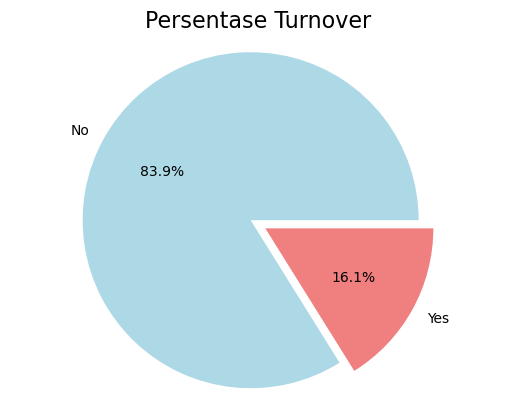

In [85]:
# persentase turnover
persen_to = df['Attrition'].value_counts(normalize=True)

# prep pie chart
label = persen_to.index
size = persen_to.values
explode = (0.1,0)

# pie chart
plt.pie(size,labels=label, autopct='%1.1f%%', explode=explode, colors=['lightblue','lightcoral'])

# add-ons
plt.axis('equal')
plt.title('Persentase Turnover',fontsize=16)

# show plot
plt.show()

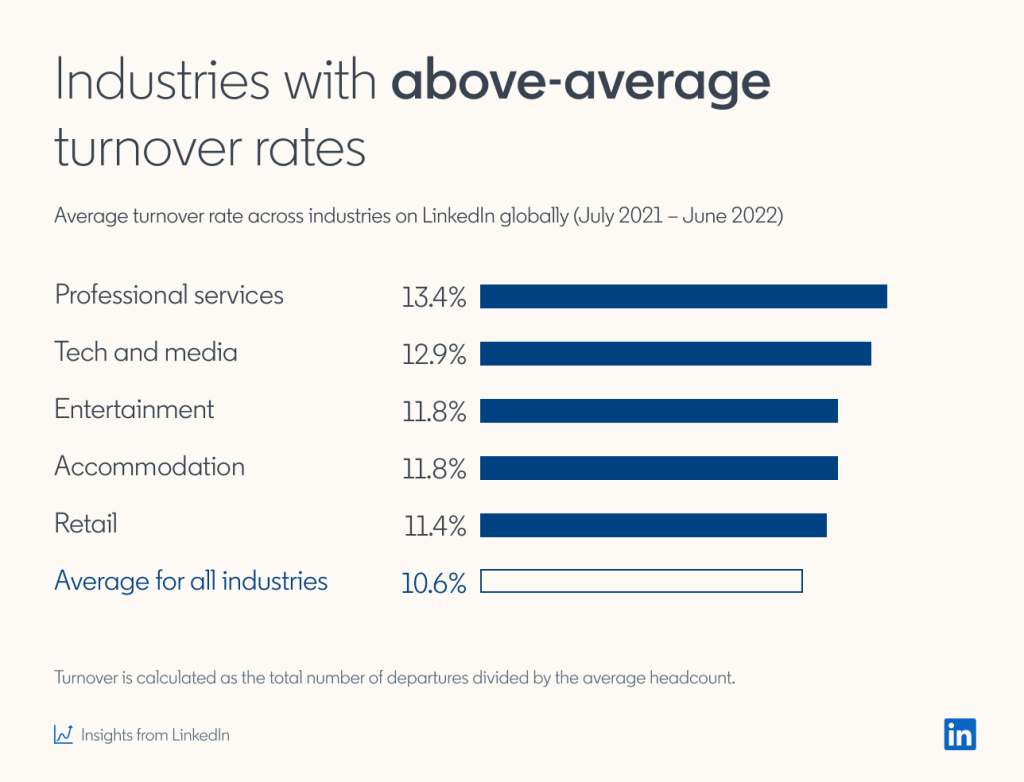

**Persentase Turnover Cukup Tinggi:**
According to [LinkedIn Data](https://www.linkedin.com/business/talent/blog/talent-strategy/industries-with-the-highest-turnover-rates), The average industry-wide turnover is 10.6%. With a turnover rate of 16.1%, this is about 6% more than the normal average turnover. This indicates the need for improvement within the company to reduce turnover.


## Fitur-Fitur yang Mempengaruhi Atrisi

To find out what features affect the tendency of employees to turnover, it is necessary to test the correlation between features and 'Attrition'.

For numerical features, Kendall's test will be applied, while for categorical features, Chi-Squared test will be applied with the following hypothesis:
- H0: Features are not correlated to Attrition.
- H1: Features are Correlated to Attrition.

In [86]:
for i in df:
    if i != 'Attrition':
        if i in num:
            print(i)
            uji_kendall(df,i,'Attrition')
        else:
            print(i)
            uji_chisquare(df,i,'Attrition')

Age
koefisien corr = -0.14201222845253333
pvalue = 5.301368496104956e-11
H0 berhasil ditolak: Age berkorelasi terhadap Attrition

BusinessTravel
H0 berhasil ditolak: BusinessTravel berkorelasi terhadap Attrition

DailyRate
koefisien corr = -0.0465487066445137
pvalue = 0.028998429662598246
H0 berhasil ditolak: DailyRate berkorelasi terhadap Attrition

Department
H0 berhasil ditolak: Department berkorelasi terhadap Attrition

DistanceFromHome
koefisien corr = 0.06676468094899914
pvalue = 0.0023863831517022243
H0 berhasil ditolak: DistanceFromHome berkorelasi terhadap Attrition

Education
H0 gagal ditolak: Education TIDAK berkorelasi terhadap Attrition

EducationField
H0 berhasil ditolak: EducationField berkorelasi terhadap Attrition

EnvironmentSatisfaction
H0 berhasil ditolak: EnvironmentSatisfaction berkorelasi terhadap Attrition

Gender
H0 gagal ditolak: Gender TIDAK berkorelasi terhadap Attrition

HourlyRate
koefisien corr = -0.005504082640481823
pvalue = 0.7975657845066744
H0 gagal 

**Features that Affect Attrition:**<br>
Features other than 'Education', 'Gender', 'HourlyRate', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', and 'RelationshipSatisfaction' have an influence on employee Turnover whether it is positive or negative.

**Positive Correlation:**<br>
DistanceFromHome, MonthlyRate, and NumCompaniesWorked have a positive correlation.

**Negative Correlation:**<br>
'Age', 'DailyRate', 'HourlyRate', 'MonthlyIncome', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', and 'YearsWithCurrManager' have a negative correlation to employee attrition.

## Karakteristik Demografis Atrisi Pegawai

In [87]:
# copy
df_demo = df.copy()
df_demo['Education'] = df_demo['Education'].astype('object')

# Statistik numerik
numerical_summary = df_demo.groupby('Attrition')[['Age']].describe()

# Statistik kategorik
categorical_summary = df_demo.groupby('Attrition')[['Gender', 'MaritalStatus','EducationField']].describe()

# Gabungkan
summary = pd.concat([numerical_summary, categorical_summary], axis=1)

# Show
summary.T

Attrition                         No            Yes
Age            count          1233.0          237.0
               mean        37.561233      33.607595
               std           8.88836        9.68935
               min              18.0           18.0
               25%              31.0           28.0
               50%              36.0           32.0
               75%              43.0           39.0
               max              60.0           58.0
Gender         count            1233            237
               unique              2              2
               top              Male           Male
               freq              732            150
MaritalStatus  count            1233            237
               unique              3              3
               top           Married         Single
               freq              589            120
EducationField count            1233            237
               unique              6              6
               top     Life Sciences  Life Sciences
               freq              517             89


**Younger age:**<br>
Younger employees are more prone to turnover. According to [Orange HR](https://www.myorangehr.com/news-events/terjadinya-turnover-karyawan-apa-faktor-penyebabnya), the possibility of more employee turnover at a younger age is due to the fact that the employee still has the spirit to try out other jobs.

**Single Status:**<br>
Unmarried employees are more likely to turnover than married ones. This may be because unmarried employees do not have extra responsibilities such as wife and children.

**Gender & Education:**<br>
There is no significant difference in gender and education level between permanent and turnover employees.

## Stress Level

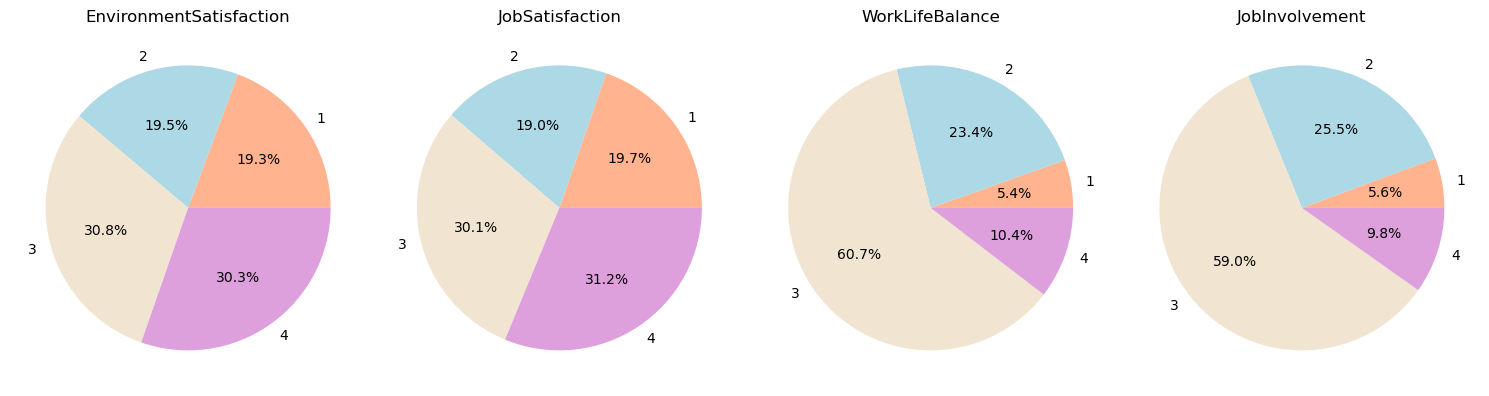

In [ ]:
# fitur
stress = ['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement']

# subplot 1x4
fig, axes = plt.subplots(1, 4, figsize=(15,15))

for feature, ax in zip(stress, axes.flatten()):
    # persentase turnover
    persen_to = df[feature].value_counts(normalize=True).sort_index()
    
    # prep pie chart
    label = persen_to.index
    size = persen_to.values
    pastel_colors = ['#FFB38E', '#ADD8E6', '#F1E5D1', '#DDA0DD']

    # pie chart
    ax.pie(size,labels=label, autopct='%1.1f%%',colors=pastel_colors)

    # add-ons
    ax.set_title(feature)

# show plot
plt.tight_layout()
plt.show()


**Environment & Job Satisfaction:**<br>
Environment & job satisfaction shows a similar graph, where more than half of the employees are satisfied with their environment and job. However, there are almost 40% of employees who still feel unsatisfied.

**Work-Life Balance & Work Engagement:**<br>
Around 30% of employees are not satisfied with either their work-life balance or work engagement. This indicates challenges such as excessive workload, lack of motivation, feeling disempowered, etc.

**Threshold Employee Engagement:**<br>
According to [Culture AMP](https://www.cultureamp.com/science/insights/all-industries-global?utm_source=chatgpt.com), the median engagement across the industry is 71%, which means:
- Ratings of satisfaction with the work environment (61%), the job (61%), and work engagement (69%) are still not reaching the threshold of healthy employee engagement. Therefore, special attention to these features is needed.
- The satisfaction assessment of work-life balance has touched 71%, but the figure has not crossed it, which means that this feature also needs attention.

### Stress Level dan Hubungannya dengan Atrisi Pegawai

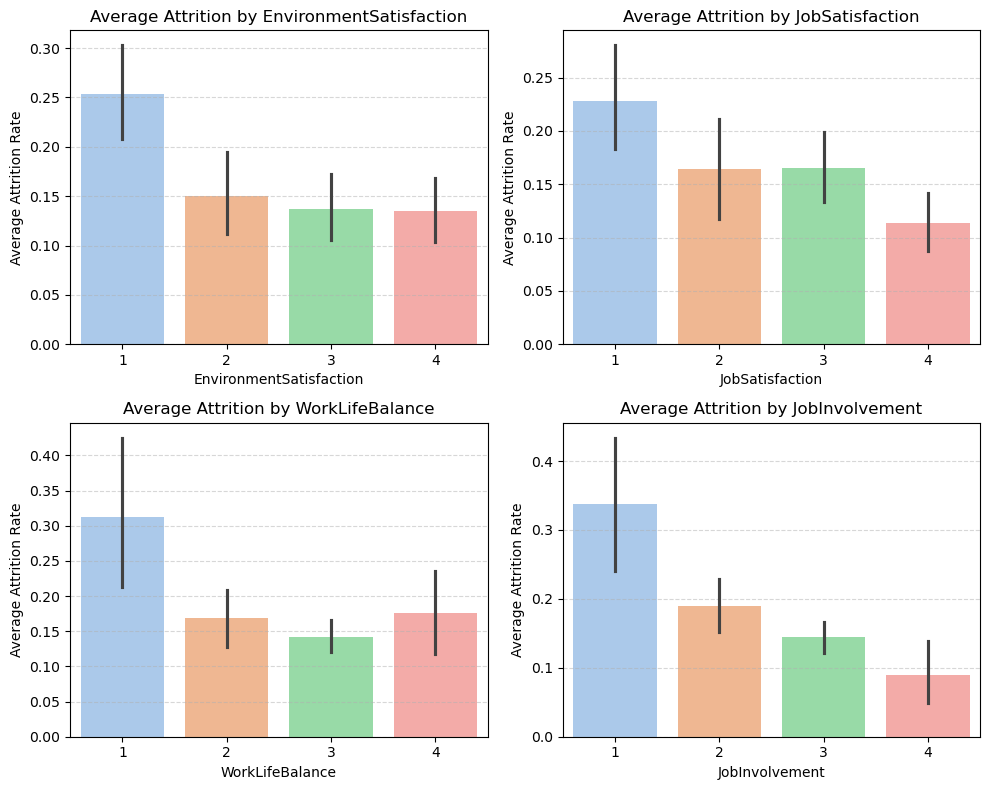

In [89]:
# fitur
stress = ['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement']

# buat subplot
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# loop barplot
for feature, ax in zip(stress, axes.flatten()):
    # barplot
    sns.barplot(x=feature, y=df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0), 
                data=df, estimator=np.mean, ax=ax, 
                palette='pastel',hue=feature, legend=False)
    
    # add-ons
    ax.set_title(f'Average Attrition by {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Average Attrition Rate')
    ax.grid(axis='y', linestyle='--', alpha=0.5)

# show plot
plt.tight_layout()
plt.show()


**Job and Workplace Satisfaction:**  <br>
Most employees are highly dissatisfied with their workplace and job. Those who are less satisfied with both are more likely to leave, although some gave scores of 3 or 4. This indicates that improving the work environment can help reduce employee turnover. Enhancing workplace conditions and ensuring job satisfaction can alleviate stress, ultimately reducing attrition.

**Work-Life Balance:**  <br>
Turnover is often driven by dissatisfaction with work-life balance. For scores ranging from 2 to 4, the distribution shows that employees experiencing turnover are spread across all levels. According to [AIHR](https://www.aihr.com/blog/what-drives-employee-turnover/), poor work-life balance can lead to significant stress (employee burnout). This highlights the importance of maintaining a good work-life balance to ensure employee stability. Regular stress assessments for employees are recommended.

**Job Engagement:**  <br>
Turnover is higher among employees with low job engagement (1). The more engaged employees feel with their work, the less likely they are to leave. Increasing job engagement can help improve employee retention.

## Atrisi Berdasarkan Departemen

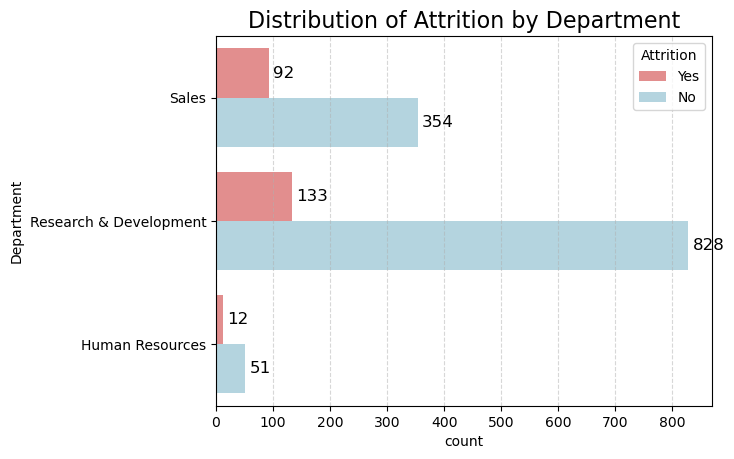

In [90]:
# countplot
plot = sns.countplot(y='Department', hue='Attrition', data=df, 
              palette={'Yes':'lightcoral', 'No':'lightblue'})

# add-ons
plt.title('Distribution of Attrition by Department', fontsize=16)
plt.grid(axis='x',linestyle='--',alpha=0.5)

# Add annotations
for container in plot.containers:
    # Add values above bars
    plot.bar_label(container, fmt='%d', label_type='edge', fontsize=12, padding=3)

# show plot
plt.show()

**High Attrition in R&D and Sales:**  <br>
R&D and Sales departments have relatively high attrition rates. This indicates specific challenges in these areas that require deeper analysis, such as heavy workloads, lack of career development opportunities, or pressure to meet targets.

**Low Attrition in HR:**  <br>
The Human Resources department has the lowest attrition rate. This might suggest a healthier work environment or could be due to the department's smaller size, resulting in fewer turnover instances.

### Deep Dive Rnd & Sales

In [91]:
# Filter data untuk RnD dan Sales
rnd_sales_data = df[df['Department'].isin(['Research & Development', 'Sales'])]

# Lihat distribusi atrisi berdasarkan department
attrition_by_dept = rnd_sales_data.groupby(['Department', 'Attrition']).size().unstack()
print(attrition_by_dept)


Attrition                No  Yes
Department                      
Research & Development  828  133
Sales                   354   92


#### Beban Kerja di Departemen R&D dan Sales

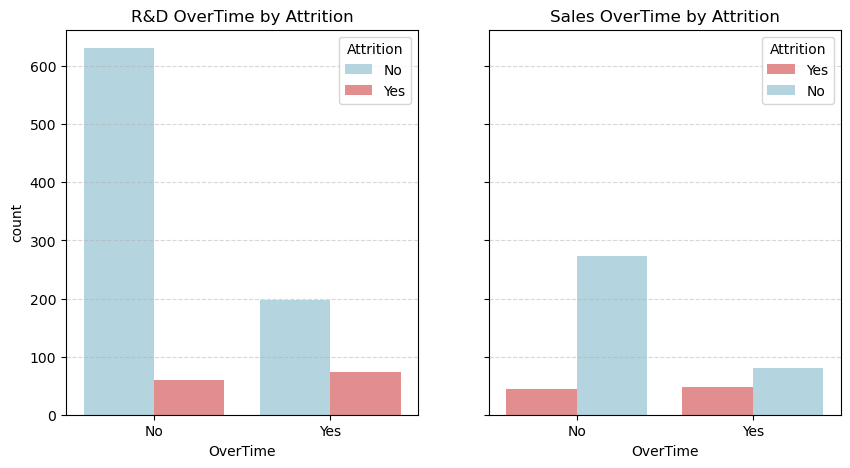

In [92]:
# add subplot
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

# plot 1 R&D overtime
sns.countplot(x='OverTime', hue='Attrition', data=rnd, palette={'Yes': 'lightcoral', 'No': 'lightblue'}, ax=ax[0])
# add ons
ax[0].set_title('R&D OverTime by Attrition')
ax[0].grid(axis='y',linestyle='--',alpha=0.5)

# plot2 Sales Overtime
sns.countplot(x='OverTime', hue='Attrition', data=sales, palette={'Yes': 'lightcoral', 'No': 'lightblue'}, ax=ax[1])
# add ons
ax[1].set_title('Sales OverTime by Attrition')
ax[1].grid(axis='y',linestyle='--',alpha=0.5)

# show plot
plt.show()


**No Overtime, Higher Retention:**  <br>
In both departments, employees who do not work overtime are more likely to stay with the company. This suggests that a lighter workload correlates with higher job satisfaction and lower attrition rates.

**Overtime and Turnover:**  <br>
Employees who work overtime show higher attrition rates. This may indicate that heavy workloads and longer working hours lead to stress and dissatisfaction, ultimately driving employees to leave.

**Departmental Differences:**  <br>
While the same pattern is observed in both departments, the total number of employees in R&D is much larger than in Sales. However, the trend linking overtime to attrition remains consistent across both departments.

#### Kepuasan dan Lama Promosi

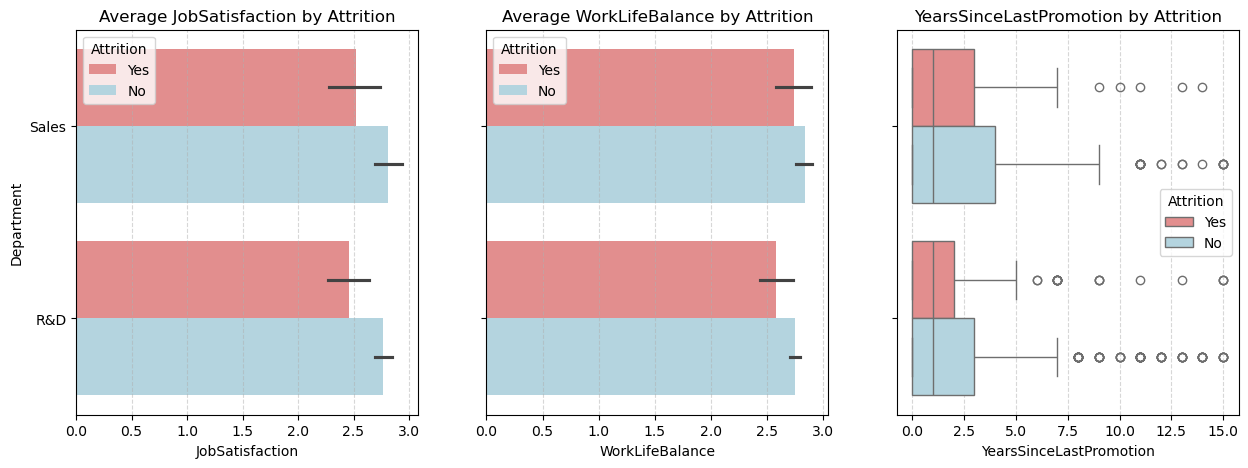

In [93]:
# add subplot
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# plot 1 R&D avg job satisfaction
sns.barplot(x='JobSatisfaction', y='Department', data=rnd_sales_data, estimator=lambda x: x.mean(), 
            hue='Attrition', palette={'Yes': 'lightcoral', 'No': 'lightblue'}, ax=ax[0])
# add ons
ax[0].set_title('Average JobSatisfaction by Attrition')
ax[0].grid(axis='x',linestyle='--',alpha=0.5)

# plot2 Sales avg work-life balance satisfaction
sns.barplot(x='WorkLifeBalance', y='Department', data=rnd_sales_data, estimator=lambda x: x.mean(),
            hue='Attrition', palette={'Yes': 'lightcoral', 'No': 'lightblue'}, ax=ax[1])
# add ons
ax[1].set_title('Average WorkLifeBalance by Attrition')
ax[1].grid(axis='x',linestyle='--',alpha=0.5)

#plot 3 boxplot years last promotion
sns.boxplot(y='Department', x='YearsSinceLastPromotion', data=rnd_sales_data,
            palette={'Yes': 'lightcoral', 'No': 'lightblue'},hue='Attrition', ax=ax[2])
# add ons
ax[2].set_title('YearsSinceLastPromotion by Attrition')
ax[2].grid(axis='x',linestyle='--',alpha=0.5)

# setting ytick    
plt.yticks(ticks=[0,1],labels=['Sales','R&D'])

# show plot
plt.show()



**Low Job Satisfaction & Work-Life Balance:**  <br>
The satisfaction scores range from 1 to 4, with the average Job Satisfaction and Work-Life Balance scores in both Sales and R&D departments falling below 3. This indicates that employee satisfaction is generally at a mid-to-low level. Many employees may feel dissatisfied with their work environment, job roles, or work-life balance. While most employees may not leave the company immediately, this dissatisfaction can impact productivity, engagement, and overall morale. If left unaddressed, it could lead to higher turnover and hinder employee retention efforts.

**Short Time After Promotion Before Turnover:**  <br>
Employees who leave in both departments tend to have shorter times since their last promotion compared to those who stay. This might suggest that despite receiving recent promotions, they may feel dissatisfied with long-term career development opportunities or see no further growth prospects within the company. Alternatively, it could reflect dissatisfaction with the company culture they have experienced.

### Atrisi berdasarkan Jenis Pekerjaan

sales: ['Sales Executive', 'Sales Manager', 'Sales Representative']
hr: ['Human Resources', 'HR Manager']
rnd: ['Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Research Director', 'RnD Manager']


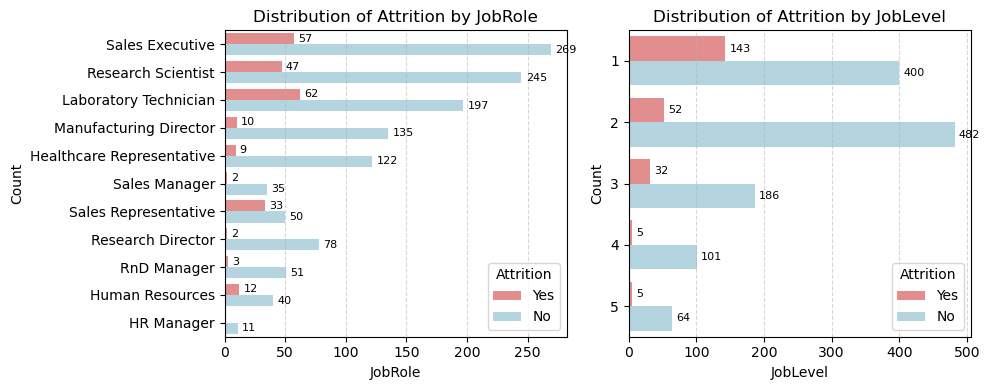

In [94]:
# check job role
print('sales:',sales['JobRole'].unique().tolist())
print('hr:',hr['JobRole'].unique().tolist())
print('rnd:',rnd['JobRole'].unique().tolist())

# fitur
stress = ['JobRole','JobLevel']

# buat subplot
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# loop countplot
for feature, ax in zip(stress, axes.flatten()):
    # countplot
    plot = sns.countplot(y=feature, hue='Attrition', data=df, ax=ax, 
                  palette={'Yes':'lightcoral', 'No':'lightblue'})
    
    # add-ons
    ax.set_title(f'Distribution of Attrition by {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.grid(axis='x',linestyle='--',alpha=0.5)


    # Add annotations
    for container in plot.containers:
        # Add values above bars
        plot.bar_label(container, fmt='%d', label_type='edge', fontsize=8, padding=3)

# show plot
plt.tight_layout()
plt.show()

**Higher Turnover in Lower Positions:**  <br>
Turnover is more common in lower job levels. This is evident from the job level graph, where the number of turnovers decreases progressively from level 1 to levels 2, 3, 4, and 5. Additionally, the attrition distribution by job role shows that the lowest turnover rates are found in higher positions, such as Manager and Director roles.

## Pengaruh Loyalitas dan Pendapatan Bulanan Terhadap Atrisi

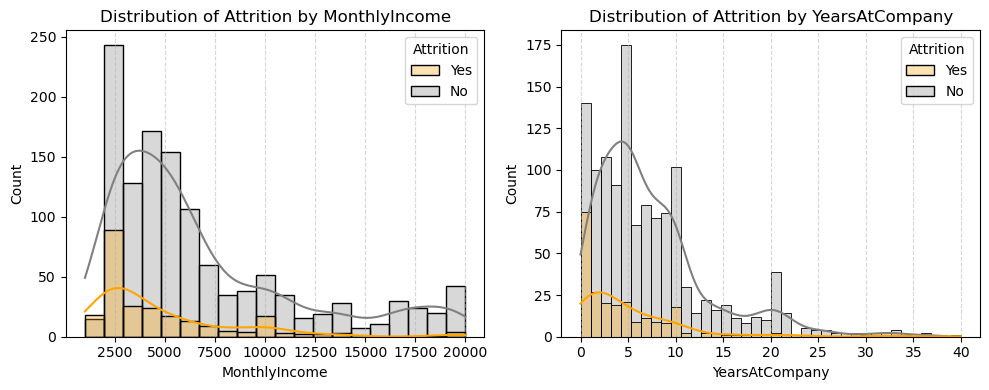

In [95]:
# fitur
stress = ['MonthlyIncome','YearsAtCompany']

# buat subplot
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# loop countplot
for feature, ax in zip(stress, axes.flatten()):
    # countplot
    plot = sns.histplot(data=df, x=feature, hue='Attrition', kde=True,
                        palette={'Yes': 'orange', 'No': 'gray'}, ax=ax, alpha=0.3)

    # add-ons
    ax.set_title(f'Distribution of Attrition by {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.grid(axis='x',linestyle='--',alpha=0.5)

# show plot
plt.tight_layout()
plt.show()

**Lower Monthly Income:**  <br>
Employees with lower monthly incomes, around 2500, have higher attrition rates. This could be due to feelings of being undervalued, salaries perceived as too low for their job level, or a correlation with age, as younger employees with lower salaries might be more inclined to explore other job opportunities.

**Turnover in Short Tenures:**<br>
Employees with shorter tenures (0 to 5 years) experience higher attrition rates. This suggests that newly joined employees, still in their adjustment phase, are more likely to leave if they are dissatisfied with the work culture or see better career prospects elsewhere. Effective onboarding and providing additional support to new employees can help reduce attrition during short tenures. This could include training, mentoring, and ensuring new hires feel well-integrated into the company.

### Atrisi pada berbagai Job Level dan hunbungannya dengan pendapatan bulanan, umur, dan Promosi Kerja

In [96]:
# Menghitung median gaji dan median umur berdasarkan JobLevel
group_joblevel = df.groupby('JobLevel').agg({
    'MonthlyIncome': 'median',   # Median gaji
    'Age': 'median',              # Median umur
    'YearsSinceLastPromotion': 'median'
}).reset_index()

# Menampilkan hasil
group_joblevel

,JobLevel,MonthlyIncome,Age,YearsSinceLastPromotion
0,1,2670.0,31.0,1.0
1,2,5340.0,35.5,1.0
2,3,9980.0,38.0,2.0
3,4,16154.0,48.0,3.0
4,5,19232.0,48.0,2.0


In [97]:
df_to = df.copy()
df_to = df_to[df_to['Attrition']=='Yes']

# Menghitung median gaji dan median umur berdasarkan JobLevel
to_by_joblevel = df_to.groupby('JobLevel').agg({
    'MonthlyIncome': 'median',   # Median gaji
    'Age': 'median',              # Median umur
    'YearsSinceLastPromotion': 'median'
}).reset_index()

# Menampilkan hasil
to_by_joblevel

,JobLevel,MonthlyIncome,Age,YearsSinceLastPromotion
0,1,2437.0,29.0,0.0
1,2,5346.0,34.5,1.0
2,3,9887.0,38.5,3.0
3,4,13194.0,42.0,11.0
4,5,19545.0,52.0,6.0


**Attrition in Job Levels 1-3:**  
For Job Levels 1-3, the median age of employees falls within the productive working years. Attrition at these levels may occur because employees are still exploring other job opportunities or finding higher-paying roles elsewhere.

**Attrition in Job Level 4:**  
Based on the data, attrition at this level is likely driven by the significant gap between the median monthly income of employees (16,154) and those who leave (13,194). Additionally, it often takes employees over a decade to reach Job Level 4, which is a lengthy period in modern work environments where faster career progression is expected. Employees at this level may feel stagnant despite their relatively high salaries, prompting them to seek opportunities elsewhere.

**Attrition in Job Level 5:**  
At this level, high salaries and extensive experience make employees highly attractive in the job market. They may leave their roles for personal reasons (e.g., early retirement or seeking jobs with lower stress levels).

## Pengaruh Durasi Jabatan dan Tenur Manager pada Atrisi Pegawai

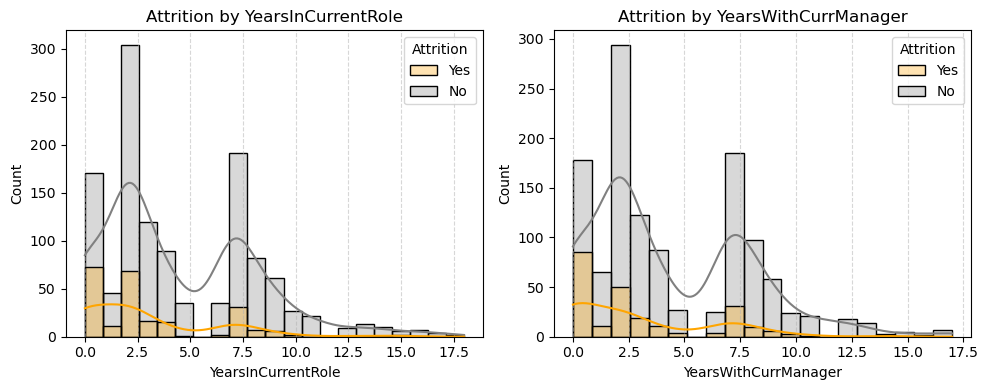

In [98]:
# fitur
stress = ['YearsInCurrentRole', 'YearsWithCurrManager']

# buat subplot
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# loop countplot
for feature, ax in zip(stress, axes.flatten()):
    # countplot
    plot = sns.histplot(data=df, x=feature, hue='Attrition', kde=True,
                        palette={'Yes': 'orange', 'No': 'gray'}, ax=ax, alpha=0.3)

    # add-ons
    ax.set_title(f'Attrition by {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.grid(axis='x',linestyle='--',alpha=0.5)

# show plot
plt.tight_layout()
plt.show()

**Early Tenure in a Position is Prone to Attrition:**  
Most employees leave their roles within 0-3 years in their current position, with attrition rates declining over time. This may occur due to unmet expectations or insufficient onboarding support.

**Manager Relationship Influences Attrition:**  
Attrition is higher during the first 0-3 years under a new manager. Employees who feel mismatched with their managers are more likely to leave quickly. After 4 years with the same manager, relationships tend to stabilize, and employees are more likely to stay.

**The Critical Early Years:**  
The early years of employment are crucial for retaining employees. Setting clear expectations, fostering positive working relationships between managers and employees during the first 1-2 years, and providing managerial training can strengthen these relationships and help reduce attrition.

# Kesimpulan

Based on the exploratory data analysis conducted, here are some key points that highlight the main factors contributing to turnover and strategies to reduce it by 6% within 12 months:  

1. **Groups Vulnerable to Turnover**:  
   - **Young Employees**: Younger employees tend to have a higher turnover rate. This may be related to their strong desire to explore different career opportunities.  
   - **Low Monthly Income**: Employees with lower salaries tend to feel undervalued and are more easily tempted to switch jobs for better pay.  
   - **Short Tenure**: Turnover is more common among employees with 0–5 years of tenure, highlighting the importance of effective onboarding and expectation management early in employment.  

2. **Departments and Roles at Risk**:  
   - **RnD and Sales**: These two departments exhibit high turnover rates, possibly due to heavy workloads, a lack of career development opportunities, or overly ambitious targets.  
   - **Low Job Levels (1–3)**: Positions at lower job levels have higher turnover rates, driven by a desire for career exploration and uncompetitive compensation.  

3. **Environmental and Job Satisfaction Factors**:  
   Dissatisfaction with work-life balance, the work environment, employee engagement, or their job itself are significant contributors to turnover.  

4. **Duration and Relationship with Managers**:  
   High turnover occurs in the early years of tenure and the relationship with managers. Poor relationships or unmet expectations with managers early on can expedite the decision to leave the company. 

# Saran


**Need for Specific Strategies**:  
   - **New Employees**: Focus on effective onboarding, mentoring, and building positive working relationships with managers to reduce the risk of turnover during the early stages of employment.  
   - **Improving Job Satisfaction**: Identify and address dissatisfaction factors, such as excessive workload and lack of career development opportunities.  
   - **Review Compensation Structure**: Reevaluate the salary structure, especially for employees with low income and those at lower to mid-level positions.  
   - **Improving Work-Life Balance**: Provide more flexibility in work schedules or workloads to enhance satisfaction with work-life balance.
